# Applying Fake-Authentic Classifier Over Facebook Political Ads

## Context:

## Problem: https://projects.propublica.org/facebook-ads/
Talos developed a model to classify 'fake' versus 'true' stories: https://blog.talosintelligence.com/2017/06/talos-fake-news-challenge.html

## Question: How can Facebook detect fake political ads (those providing false information, not just exaggerated) posing as news among exaggerated political ads, which are real?

~What are the most common words in the entire dataset?
~What are the most common words in the dataset for negative and positive tweets, respectively?
~How many hashtags are there in a tweet?
~Which trends are associated with my dataset?
~Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## Methodology:
Step 3: Data Cleaning/Munging
    Replaced null
    Special character handling
    Structuring news content
    Transformed Real News data from file level to original fake news format.
    Encoding
Step 4: Exploratory Data Analysis
    Identify unique roots, "lemmas", through Lemmatization
    Develop worldclouds on Fake-True
    
Step 5: Contrast wordlcloud in "fake_df" with wordcloud in "true_df".
Step 6: Identify lemmas through 

Apply both classifiers over FB dataset.

## Part 1: Learning a Classifier Model from Articles Review

In [1]:
!wget -c 'https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true'
!wget -c "https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_True.csv.zip?raw=true"
!unzip -o  "572515_1037534_compressed_Fake.csv.zip?raw=true"
!unzip -o "572515_1037534_compressed_True.csv.zip?raw=true"

--2020-08-02 23:53:25--  https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pitaconsumer/some-datasets/raw/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-08-02 23:53:26--  https://github.com/pitaconsumer/some-datasets/raw/master/572515_1037534_compressed_Fake.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pitaconsumer/some-datasets/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-08-02 23:53:26--  https://raw.githubusercontent.com/pitaconsumer/some-datasets/master/572515_1037534_compressed_Fake.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.0.133,

In [ ]:
!pip install spacy tqdm

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!pip install textblob

In [ ]:
!pip install nltk

In [ ]:
!pip install preprocessor

In [ ]:
!pip install seaborn

In [116]:
!pip install wordcloud

     |████████████████████████████████| 364 kB 337 kB/s eta 0:00:01


In [60]:
!pip install xlrd

     |████████████████████████████████| 103 kB 12.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [30]:
pd.__version__

'1.0.4'

In [56]:
!pip install openpyxl

     |████████████████████████████████| 241 kB 359 kB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=1f73d529fc9b17cf02a770da10fa7d392180cce473a31d91359a04e4ed3af474
  Stored in directory: /root/.cache/pip/wheels/ef/92/e0/956c00decf3091294b8800d9104f6169a1adacfaafd122ed42
Successfully built et-xmlfile


In [139]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 73.6 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 59.7 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110317 sha256=dc241d4eeccf5095c9c36ce7dbbc7564015822f65897a471166a58a8335edf8b
  Stored in directory: /root/.cache/pip/wheels/a4/9b/d5/85705a7ab783cd6f7bd718f01d3b1396272f30044e3c36401a
Successfully built smart-open
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [76]:
!pip3 install tensorflow_hub

     |████████████████████████████████| 101 kB 427 kB/s ta 0:00:011
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [37]:
!pip install nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import spacy 
import en_core_web_lg

spacy.prefer_gpu()
nlp = en_core_web_lg.load()

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress bar")


import preprocessor
from textblob import TextBlob
import statistics
from typing import List


import scipy

import spacy
import nltk
import re

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1 (Move up to explain before constructing RFC)
### Importing first Facebook dataset to argue for business case.

### Observation
We see that we have 162,314 records of political ad data on Facebook. The last ten sample how ads were purchased by nonpartisan groups, like "League of Conservation Voters", political organizer groups, like "Indivisible Project", unions "AFT", and international nonprofits like "International Rescue Committee". 

### Descriptive Statistics: Average Dollars Spent on Facebook Ads
From another dataset.

In [3]:
#First Facebook Dataset
#Formerly known as fb_likes = pd.read_csv('/Users/mehrunisaqayyum/Downloads/pseudo_facebook.csv')
fb_likes = pd.read_csv('pseudo_facebook.csv')
fb_likes

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [4]:
#Second Facebook Data set
fb = pd.read_csv('fbpac-ads-en-US.csv.xz', dtype={'message': 'string', 'title': 'string', 'paid_for_by':'string'}) #'/Users/mehrunisaqayyum/Downloads/work/fbpac.csv'
fb

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [5]:
fb.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [6]:
fb.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              string
message                            string
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        string
targetedness                      float64
listbuilding_fundraising_proba    

In [7]:
#Third Facebook Dataset
#Formerly known as clicks_df = pd.read_csv('/Users/mehrunisaqayyum/Downloads/datasets_104115_247225_data.csv')
clicks_df = pd.read_csv('datasets_104115_247225_data.csv')
clicks_df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710000,8,2.00,NaN,NaN


In [8]:
clicks_df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

### Feature Description: Third Facebook Dataset (clicks_df)

ad_id is the id of specific ad set | Numeric

Reporting_start and reporting_end are the start and end dates of the each ad | Numeric

Campaign_id is the id assigned by the ad running company | Numeric- Negligible

fb_campaign_id is the id assigned by facebook for every ad set| Numeric- Negligible

age and gender talk about the demographics | Categorical

Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were targeted for the ad | Categorical 

Impressions are the number of times the ad was shown to the users |Numeric

Clicks is the number of time users clicked on the ad | Numeric

spent is the amount of money spent on each campaign | Numeric

Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
approved_conversions tells how many became actual active users | Numerica

In [9]:
#Concatenate the first Facebook dataset with political ads as text with
#the second Facebook dataset that show metrics, like Facebook 'Likes'.

fb_df2 = pd.concat([fb, fb_likes], ignore_index=True, sort =True)
fb_df2

,advertiser,age,created_at,dob_day,dob_month,dob_year,entities,friend_count,friendships_initiated,gender,...,targeting,targetings,targets,tenure,thumbnail,title,updated_at,userid,www_likes,www_likes_received
0,NaN,NaN,2019-03-27 16:52:25.625455+00,NaN,NaN,NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,League of Conservation Voters,2019-03-27 16:52:25.625455+00,NaN,NaN,NaN
1,NaN,NaN,2019-03-27 17:28:14.096849+00,NaN,NaN,NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Indivisible Guide,2019-03-27 17:28:14.096849+00,NaN,NaN,NaN
2,NaN,NaN,2019-03-27 17:38:23.101377+00,NaN,NaN,NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,International Rescue Committee,2019-03-27 17:38:23.101377+00,NaN,NaN,NaN
3,Covenant House International,NaN,2018-12-30 20:59:13.879124+00,NaN,NaN,NaN,[],NaN,NaN,NaN,...,"<div><div class=""_4-i0 _26c5""><div class=""clea...","{""<div><div class=\""_4-i0 _26c5\""><div class=\...","[{""target"": ""Activity on the Facebook Family""}...",NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Covenant House International,2018-12-30 20:59:13.879124+00,NaN,NaN,NaN
4,NaN,NaN,2019-03-27 17:18:29.764002+00,NaN,NaN,NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",NaN,NaN,NaN,...,NaN,NaN,[],NaN,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,Planned Parenthood,2019-04-11 15:02:58.081112+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261322,NaN,68.0,NaN,4.0,4.0,1945.0,NaN,2118.0,341.0,female,...,NaN,NaN,NaN,541.0,NaN,NaN,NaN,1268299.0,491.0,6202.0
261323,NaN,18.0,NaN,12.0,3.0,1995.0,NaN,1968.0,1720.0,female,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,1256153.0,2.0,2820.0
261324,NaN,15.0,NaN,10.0,5.0,1998.0,NaN,2002.0,1524.0,female,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,1195943.0,0.0,1092.0
261325,NaN,23.0,NaN,11.0,4.0,1990.0,NaN,2560.0,185.0,female,...,NaN,NaN,NaN,416.0,NaN,NaN,NaN,1468023.0,0.0,756.0


In [10]:
fb_df2.columns

Index(['advertiser', 'age', 'created_at', 'dob_day', 'dob_month', 'dob_year',
       'entities', 'friend_count', 'friendships_initiated', 'gender', 'html',
       'id', 'images', 'impressions', 'lang', 'likes', 'likes_received',
       'listbuilding_fundraising_proba', 'lower_page', 'message',
       'mobile_likes', 'mobile_likes_received', 'not_political', 'page',
       'paid_for_by', 'political', 'political_probability', 'suppressed',
       'targetedness', 'targeting', 'targetings', 'targets', 'tenure',
       'thumbnail', 'title', 'updated_at', 'userid', 'www_likes',
       'www_likes_received'],
      dtype='object')

### Feature Description: Second Facebook Dataset

ad_id is the id of specific ad set | Numeric

Reporting_start and reporting_end are the start and end dates of the each ad | Numeric

Campaign_id is the id assigned by the ad running company | Numeric- Negligible

fb_campaign_id is the id assigned by facebook for every ad set| Numeric- Negligible

age and gender talk about the demographics | Categorical

Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were targeted for the ad | Categorical 

Impressions are the number of times the ad was shown to the users |Numeric

Clicks is the number of time users clicked on the ad | Numeric

spent is the amount of money spent on each campaign | Numeric

Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
approved_conversions tells how many became actual active users | Numeric

#### Observation: 
We have columns like "political", 'not_political', 'title' and 'message' of the advertisement; 'created at'; 'lang' for languages; 'political_probabilty', and 'paid_for_by'.

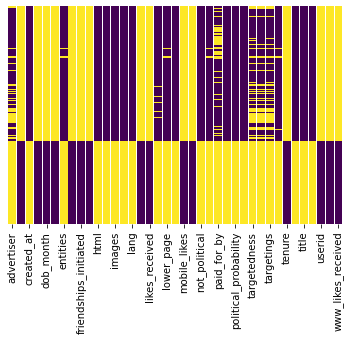

In [11]:
# to check missing values
sns.heatmap(fb_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
#Check correlation across all Facebook columns
facebook = fb_df2.corr()
facebook

,age,dob_day,dob_month,dob_year,friend_count,friendships_initiated,impressions,likes,likes_received,listbuilding_fundraising_proba,mobile_likes,mobile_likes_received,not_political,political,political_probability,targetedness,tenure,userid,www_likes,www_likes_received
age,1.000000,0.035035,0.025167,-1.000000,-0.027407,-0.058059,NaN,-0.013009,-0.022570,NaN,-0.026715,-0.024248,NaN,NaN,NaN,NaN,0.462742,-0.007265,0.015585,-0.018224
dob_day,0.035035,1.000000,0.129443,-0.035035,0.021961,0.022999,NaN,0.015980,0.001367,NaN,0.014541,0.000497,NaN,NaN,NaN,NaN,0.041855,-0.000839,0.009353,0.002460
dob_month,0.025167,0.129443,1.000000,-0.025167,0.019804,0.020075,NaN,0.014147,0.006495,NaN,0.010400,0.006435,NaN,NaN,NaN,NaN,0.029446,0.002924,0.012136,0.006003
dob_year,-1.000000,-0.035035,-0.025167,1.000000,0.027407,0.058059,NaN,0.013009,0.022570,NaN,0.026715,0.024248,NaN,NaN,NaN,NaN,-0.462742,0.007265,-0.015585,0.018224
friend_count,-0.027407,0.021961,0.019804,0.027407,1.000000,0.825850,NaN,0.298017,0.236463,NaN,0.235656,0.232701,NaN,NaN,NaN,NaN,0.166256,-0.001314,0.229803,0.220727
friendships_initiated,-0.058059,0.022999,0.020075,0.058059,0.825850,1.000000,NaN,0.285592,0.175131,NaN,0.229808,0.173804,NaN,NaN,NaN,NaN,0.133505,-0.001591,0.214022,0.161439
impressions,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.011552,NaN,NaN,0.008487,-0.004525,0.009100,-0.015223,NaN,NaN,NaN,NaN
likes,-0.013009,0.015980,0.014147,0.013009,0.298017,0.285592,NaN,1.000000,0.327376,NaN,0.871652,0.329258,NaN,NaN,NaN,NaN,0.057132,-0.002875,0.644960,0.295687
likes_received,-0.022570,0.001367,0.006495,0.022570,0.236463,0.175131,NaN,0.327376,1.000000,NaN,0.256998,0.973679,NaN,NaN,NaN,NaN,0.027745,0.001526,0.255365,0.947990
listbuilding_fundraising_proba,NaN,NaN,NaN,NaN,NaN,NaN,0.011552,NaN,NaN,1.000000,NaN,NaN,0.018845,-0.099580,0.050328,-0.205439,NaN,NaN,NaN,NaN


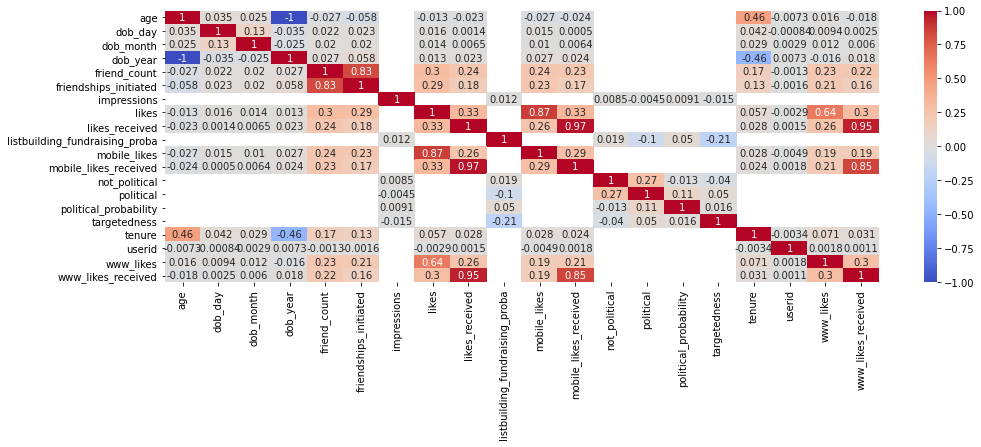

In [13]:
plt.figure(figsize = (16,5))
sns.heatmap(facebook, annot=True, cmap='coolwarm')

In [14]:
#Used 'clicks' and 'spent' to calculate the cost per click and per ad.

click_count_per_add = clicks_df.clicks.sum()/clicks_df.clicks.count()
click_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
ad_spend_count_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
print('Total number of Ads purcheased by IRA from 2015 to 2017: ', clicks_df.clicks.count())
print('Total dollar spent by IRA from 2015 to 2017: ${:.2f}'.format(clicks_df.spent.sum()/63))
print('Average cost per Ad: ${:.2f}'.format(ad_spend_count_ratio))
print('Average number of clicks per Ad: {:.2f}'.format(click_count_per_add))
print('Avg cost per click: ${:.2f}'.format(click_ratio))

Total number of Ads purcheased by IRA from 2015 to 2017:  1143
Total dollar spent by IRA from 2015 to 2017: $319.27
Average cost per Ad: $0.28
Average number of clicks per Ad: 11.63
Avg cost per click: $0.28


In [15]:
#Who boughtthe most political ads, which are represented as 'paid_for_by'?
fb_df2['paid_for_by'].value_counts()

International Rescue Committee                                                   2944
INSLEE FOR AMERICA                                                               1904
Planned Parenthood Action Fund.                                                  1781
Beto for Texas                                                                   1558
Planned Parenthood Federation of America                                         1495
                                                                                 ... 
Charlotte Rescue Mission                                                            1
National Benevolent Association of the Christian Church (Disciples of Christ)       1
Anne Oliva for Millbrae City Council                                                1
Citizens for Judge Millenacker                                                      1
Sharron Williams                                                                    1
Name: paid_for_by, Length: 8786, dtype: int64

In [16]:
#How do the political ads skew, which is measured by 'political_probability'?
fb_df2['political_probability'].value_counts()

0.997035    100
0.999966     76
1.000000     58
0.994729     58
0.998729     57
           ... 
0.999994      1
0.885738      1
0.999841      1
0.991699      1
0.999910      1
Name: political_probability, Length: 138951, dtype: int64

### Visual 1:

In [17]:
#Plot

## Part 2: Supervised Learning~Developing a Fake-True Classifier 

In [18]:
fake_df = pd.read_csv('Fake.csv')

In [19]:
%time fake_df.shape

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 15 µs


(23481, 4)

In [20]:
true_df = pd.read_csv("True.csv") 

In [21]:
#Transform 'Fake' and 'True' into Vectors
fake_vectors = fake_df['text'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

progress bar: 100%|██████████| 23481/23481 [20:27<00:00, 19.14it/s]


In [22]:
true_vectors = true_df['text'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

progress bar: 100%|██████████| 21417/21417 [17:30<00:00, 20.39it/s]


In [23]:
fake_vectors['y'] = 0
true_vectors['y'] = 1

In [24]:
fake_vectors.to_pickle('fake_vectors.pickle')
true_vectors.to_pickle('true_vectors.pickle')

In [25]:
true_df['y'] = 1
fake_df['y'] = 0

all_df= pd.concat([true_df, fake_df], ignore_index=True)

In [26]:
all_df

,title,text,subject,date,y
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [27]:
#Do I open pick from here?
import pickle

with open('fake_vectors.pickle','rb') as pickle_fake_file:
    new_data = pickle.load(pickle_fake_file)

In [28]:
#Open pickled true_vectors
with open('true_vectors.pickle','rb') as pickle_true_file:
    new_data_1 = pickle.load(pickle_true_file)

In [29]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.073540,0.179043,-0.076617,-0.074791,0.036038,0.004575,0.038492,-0.124255,0.012717,1.862951,...,0.044990,-0.041565,-0.008473,0.055128,-0.023180,-0.057157,-0.064061,-0.010495,0.059500,0
1,-0.038420,0.112145,-0.020147,-0.038843,0.062101,0.009020,0.000529,-0.113623,-0.018777,2.087343,...,0.048287,0.033861,-0.028116,0.030789,-0.019481,0.008779,-0.053712,-0.034191,0.036353,0
2,-0.098106,0.149208,-0.081227,-0.040716,0.033538,0.005689,0.010260,-0.139970,0.014237,1.806199,...,0.032597,0.010494,-0.025870,0.010836,-0.027967,-0.023326,-0.058981,-0.021968,0.061126,0
3,-0.014255,0.188537,-0.061617,-0.046817,0.030777,0.004907,0.032604,-0.137589,0.032387,1.788117,...,0.049074,-0.036654,0.005065,0.025697,-0.028793,-0.042833,-0.066778,-0.018758,0.078419,0
4,0.007560,0.130828,-0.123254,-0.061600,0.099309,-0.055719,-0.000825,0.011277,-0.011651,2.309839,...,0.051376,0.007235,-0.043971,-0.010446,0.000687,-0.027288,0.002399,-0.014394,0.053081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23476,-0.045328,0.084530,-0.025417,0.007723,0.019797,-0.073086,-0.031525,-0.040934,-0.038671,2.101369,...,0.027967,0.005700,-0.054585,0.009037,0.035417,-0.035382,-0.026119,-0.057935,0.040895,0
23477,-0.087462,0.171399,-0.144660,-0.036400,0.017735,-0.006056,0.032346,-0.148954,0.028520,2.060879,...,-0.007337,0.057236,0.013006,0.004924,-0.043355,-0.024612,-0.092349,0.016155,0.116500,0
23478,-0.040295,0.110621,-0.058626,-0.002404,0.078674,-0.023271,-0.046585,-0.009180,-0.027003,2.040526,...,0.052900,-0.012356,-0.065988,-0.011068,-0.004687,-0.034750,-0.044607,-0.047977,0.078209,0
23479,-0.074733,0.146664,-0.035597,-0.029466,0.049446,-0.003797,-0.035792,-0.051611,0.002876,2.006130,...,0.047997,-0.013535,-0.056618,0.006772,-0.022828,-0.027595,-0.056708,-0.063996,0.094185,0


In [30]:
new_data_1

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.077045,0.137928,-0.029863,-0.043818,0.018094,-0.026393,-0.010395,-0.063394,0.015003,2.267783,...,0.037773,0.051070,-0.018882,-0.035121,-0.042191,-0.006617,-0.077164,-0.020805,0.032421,1
1,-0.005601,0.102553,-0.040377,-0.017378,0.052456,-0.048827,-0.010244,-0.071709,0.000173,2.319211,...,0.008485,0.034637,-0.052381,-0.052699,-0.038225,0.016309,-0.029618,0.007680,0.078654,1
2,-0.071985,0.137102,-0.023084,0.007325,0.021769,-0.008143,-0.021491,-0.073408,-0.012904,2.257797,...,0.054494,0.032082,-0.039396,-0.015308,-0.044815,0.006643,-0.053624,-0.025692,0.074887,1
3,-0.055290,0.135360,-0.024869,-0.006838,0.037351,0.001647,-0.010557,-0.131788,-0.010290,2.201516,...,0.048563,0.057590,0.001935,-0.009384,-0.041360,0.011062,-0.048584,-0.029900,0.084397,1
4,-0.092347,0.209557,-0.022667,-0.067958,0.041882,-0.026064,-0.031319,-0.124187,0.008946,2.129805,...,0.016510,0.071011,0.006577,-0.042398,-0.071480,-0.033222,-0.075323,-0.016498,0.062905,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,-0.079098,0.157675,-0.008801,-0.023159,0.052198,-0.069260,-0.060608,-0.018470,-0.028957,2.152217,...,0.075240,0.005661,-0.048215,-0.009564,-0.019111,-0.011241,-0.022576,-0.053715,0.078367,1
21413,-0.002175,0.143853,-0.049409,-0.005530,0.095323,-0.026330,-0.071241,-0.141275,-0.012069,1.928587,...,0.006547,0.035877,0.013736,-0.041005,-0.129005,-0.056857,-0.010757,-0.029023,0.142241,1
21414,0.049846,0.165953,-0.044917,-0.057135,0.098616,-0.016374,-0.004077,-0.079089,-0.052189,2.075670,...,0.012907,0.035522,-0.016758,-0.048333,-0.019664,-0.023678,-0.051855,-0.016938,0.070996,1
21415,-0.005206,0.135035,-0.070343,-0.018322,0.092693,-0.027997,0.004304,-0.020203,-0.018922,2.136226,...,0.029353,0.022521,-0.048694,0.000964,-0.023544,-0.028445,0.003450,-0.013560,0.076916,1


In [31]:
#Need to import library for Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#Clean text for real news 

def clean_text(text):
    text = text.lower()
    text = re.sub('<.*?>', "", text) #Remove html tag
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') #Return leftover urls
    text = re.sub(pattern, ' ', text) #includes pattern when the urls weren't removed from above
    #token = word_tokenize(text)
    words = [word for word in text.split(" ") if word.isalpha()]
    stop_words = set(stopwords.words("english"))
   # #Include additional noise words
    stop_words.add("not")
    stop_words.add("this")
    stop_words.add("would")
    stop_words.add("also")
    stop_words.add("could")
    stop_words.add("said")
    PS = PorterStemmer()
    words = [PS.stem(w) for w in words if w not in stop_words]
    words = ' '.join(words)
    return words
    return stop_words

In [33]:
clean_text("Donald said You're FIRED")

'donald fire'

In [34]:
#Check the noise, or 'stop_words'
stop_words = set(stopwords.words('english'))
print(stop_words)

{"needn't", 'few', 'own', 'we', 'of', 'further', 're', 'them', 'that', 'about', 'wasn', 'yourself', "isn't", 'y', 'won', 'some', "won't", 'into', 'against', "mustn't", "haven't", 'wouldn', 'theirs', 'during', 'to', 'not', "you're", 'hasn', 'don', 'and', 'above', 'am', 'the', 'yours', 'very', 'doesn', 'be', "it's", 'over', 'through', 'was', 'because', 'in', 'why', 'hers', 'all', 'they', "that'll", 've', 'ma', 'o', "shan't", 'were', 'he', 'other', "you'll", "hasn't", 'm', 'ours', 'myself', 'or', 'had', 'then', 'aren', "wouldn't", 'more', 'any', 'but', 'mightn', 'out', 'couldn', 'her', 'what', 'do', 'doing', 'it', 'at', 'up', 'too', 'on', 'me', "didn't", 'mustn', 'who', 'whom', "don't", 'she', 'which', 'shouldn', 'is', 'have', 'haven', 'my', 'yourselves', 'just', 'i', 'these', "hadn't", 'again', 'same', 'his', 'isn', 'an', 'being', 'as', 'ain', 'been', 'having', 'did', 'herself', 'for', 'both', 'than', 'a', "you'd", 'has', 'our', 'there', 'here', 'no', 'll', 'those', 'most', 's', 'before'

In [35]:
print(all_df['text'].apply(clean_text))

0        washington head conserv republican faction vot...
1        washington transgend peopl allow first time en...
2        washington special counsel investig link russi...
3        washington trump campaign advis georg papadopo...
4        presid donald trump call postal servic friday ...
                               ...                        
44893    centuri wire say report earlier unlik mishap t...
44894    centuri wire say familiar whenev disput chang ...
44895    patrick henningsen centuri wirerememb obama ad...
44896    centuri wire say al jazeera america go histori...
44897    centuri wire say predict new year look new hos...
Name: text, Length: 44898, dtype: object


In [36]:
# Let's take a look at the updated text
all_df['updated_text'] = all_df['text'].apply(clean_text)

In [37]:
all_df[['updated_text', 'text']]

,updated_text,text
0,washington head conserv republican faction vot...,WASHINGTON (Reuters) - The head of a conservat...
1,washington transgend peopl allow first time en...,WASHINGTON (Reuters) - Transgender people will...
2,washington special counsel investig link russi...,WASHINGTON (Reuters) - The special counsel inv...
3,washington trump campaign advis georg papadopo...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,presid donald trump call postal servic friday ...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
44893,centuri wire say report earlier unlik mishap t...,21st Century Wire says As 21WIRE reported earl...
44894,centuri wire say familiar whenev disput chang ...,21st Century Wire says It s a familiar theme. ...
44895,patrick henningsen centuri wirerememb obama ad...,Patrick Henningsen 21st Century WireRemember ...
44896,centuri wire say al jazeera america go histori...,21st Century Wire says Al Jazeera America will...


In [38]:
from collections import Counter

c = Counter()

ignore_this = all_df['updated_text'].apply(lambda row: c.update(row.split(" ")))

In [39]:
top_words = c.most_common(100)
top_words

[('trump', 102168),
 ('presid', 48106),
 ('state', 46619),
 ('peopl', 34875),
 ('republican', 34816),
 ('one', 34268),
 ('say', 30570),
 ('new', 30513),
 ('like', 28222),
 ('donald', 27063),
 ('democrat', 24948),
 ('unit', 24743),
 ('govern', 24724),
 ('hous', 24673),
 ('call', 23770),
 ('nation', 23665),
 ('told', 23203),
 ('support', 22745),
 ('make', 22692),
 ('go', 22408),
 ('report', 21961),
 ('clinton', 21918),
 ('obama', 21904),
 ('white', 21892),
 ('time', 20909),
 ('last', 20681),
 ('american', 20642),
 ('year', 20287),
 ('get', 20121),
 ('senat', 20017),
 ('use', 19858),
 ('includ', 19463),
 ('two', 19337),
 ('offici', 18984),
 ('want', 18751),
 ('take', 18538),
 ('campaign', 18196),
 ('polit', 18154),
 ('vote', 18108),
 ('elect', 17988),
 ('even', 17976),
 ('former', 17596),
 ('parti', 17574),
 ('news', 17499),
 ('first', 17437),
 ('work', 17236),
 ('right', 16753),
 ('countri', 16715),
 ('secur', 16100),
 ('mani', 15934),
 ('washington', 15318),
 ('group', 15209),
 ('back',

## Visualizing Top Words
Plot the top 100 words identified within the fake and real news datasets after identifying 'noise words' and performing another round of cleaning in pre-processing.

Contrast wordlcloud in "fake_df" with wordcloud in "true_df".

### Observation: The following emerged as the "Top 100" words. Although we ran a function to remove 'Stop Words', let's flag noise words.
Trump, said,state', 
'peopl', 
 'republican','one', 'also', 'say', 'new','like','donald', 'democrat', 'unit', 'govern', 
 'hous', 
 'call', 'could','nation', 'told', 'support', 'make', 'go', 'report', 'clinton','obama','white','time', 'last', 'american', 'year', 'get', 
 'senat',
 'use',
 'includ', 
 'two', 
 'offici', 
 'want', 'take', 'campaign', 
 'polit',
 'vote', 'elect', 'even', 'former', 
 'parti', 
 'news', 'first',work',
 ('right', 16752),
 ('countri', 16715),
 ('secur', 16100),
 ('mani', 15934),
 ('washington', 15318),
 ('group', 15209),
 ('back', 15170),
 ('hillari', 15164),
 ('come', 14857),
 ('may', 14463),
 ('need', 14360),
 ('think', 14345),
 ('made', 14330),
 ('show', 14269),
 ('offic', 14168),
 ('sinc', 14041),
 ('presidenti', 13600),
 ('polic', 13567),
 ('us', 13564),
 ('ask', 13539),
 ('plan', 13350),
 ('law', 13240),
 ('court', 13165),
 ('accord', 12981),
 ('million', 12918),
 ('media', 12881),
 ('attack', 12699),
 ('imag', 12573),
 ('leader', 12563),
 ('help', 12492),
 ('tri', 12489),
 ('know', 12487),
 ('feder', 12085),
 ('north', 12051),
 ('day', 11930),
 ('foreign', 11759),
 ('member', 11691),
 ('forc', 11674),
 ('tax', 11627),
 ('public', 11602),
 ('percent', 11524),
 ('bill', 11468),
 ('administr', 11421),
 ('investig', 11267),
 ('see', 11118),
 ('talk', 11107),
 ('way', 11047),
 ('part', 10931),
 ('russian', 10712)] 

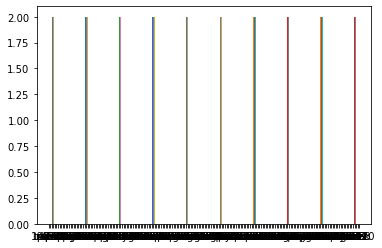

In [40]:
x = top_words
plt.hist(x, bins = 10)

plt.show()

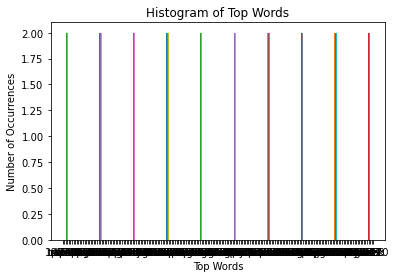

In [41]:
#Plot number of times 'Top Words' listed
fig, ax = plt.subplots()

plt.hist(x, bins = 10)
ax.set_xlabel('Top Words')
ax.set_ylabel('Number of Occurrences')
ax.set_title(r'Histogram of Top Words')

plt.show()

### Feature: Number of Words ('num_words')
Include

In [42]:
#Stopwords feature
## Number of stopwords in the text for both True and Fake datasets b/c cleaned text (all_df) excludes
all_df["number_stopwords"] = true_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
all_df

,title,text,subject,date,y,updated_text,number_stopwords
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington head conserv republican faction vot...,282.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington transgend peopl allow first time en...,233.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington special counsel investig link russi...,184.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington trump campaign advis georg papadopo...,142.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,presid donald trump call postal servic friday ...,334.0
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,centuri wire say report earlier unlik mishap t...,NaN
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,centuri wire say familiar whenev disput chang ...,NaN
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,patrick henningsen centuri wirerememb obama ad...,NaN
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,centuri wire say al jazeera america go histori...,NaN


In [43]:
## Number of words in the text ##
#df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))
all_df["num_words"] = all_df["text"].apply(lambda x: len(str(x).split()))
all_df["num_words"]

0         749
1         624
2         457
3         376
4         852
         ... 
44893     522
44894     297
44895    4171
44896     456
44897     874
Name: num_words, Length: 44898, dtype: int64

In [44]:
all_df

,title,text,subject,date,y,updated_text,number_stopwords,num_words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington head conserv republican faction vot...,282.0,749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington transgend peopl allow first time en...,233.0,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington special counsel investig link russi...,184.0,457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington trump campaign advis georg papadopo...,142.0,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,presid donald trump call postal servic friday ...,334.0,852
...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,centuri wire say report earlier unlik mishap t...,NaN,522
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,centuri wire say familiar whenev disput chang ...,NaN,297
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,patrick henningsen centuri wirerememb obama ad...,NaN,4171
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,centuri wire say al jazeera america go histori...,NaN,456


## Lemmatization

### Lemmatizer as Fake Criterion Feature: 
Identify Lemmas that occur the most in Fake-Real Classifier. Review if Lemma appears in Facebook 'message' and label as a feature of Fake-Real criterion.
Suspect that certain lemmas emerge consistently in fake news. 
*"Reporting", "Reporter", "Reports"
*"Supporter", "Supporting", "Supporter", "Support"
*Polling,polls, poll, pollster

These three lems "report", "support", and "poll" are used as both nouns and verbs. 

In [45]:
# Use 'Supporting'
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "supporting" 
lem.lemmatize(word, "v")

stem.stem(word)

'support'

### Features of 'Support' Lemma
We can use the lemma to compare across the 'fake' and'real' news data sets to test whether there is a significant
difference in use of that particulare lemma in each category to note a distinction.  We would conduct a t-test bewteen the two classes: 'fake' and 'real'. Or we could run an F-test on the newly created feature.

If there is a distinction, that might be a better indicator for the Facebook Data set when distinguishing between 'fake' and 'real' stories in the political ads section.

#### Note: Convert Lemma 'support' into Feature to Count and Compare Across Fake and True datasets. Then if significant, add as feature in Facebook dataset.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

In [46]:
# Use 'Supporters' as a noun
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "supporters" 
lem.lemmatize(word, "n")

stem.stem(word)

'support'

In [47]:
# Use 'reporting'
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "reporting" 
lem.lemmatize(word, "v")

stem.stem(word)

'report'

In [48]:
# Use 'reporting'
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "reporting" 
lem.lemmatize(word, "v")

stem.stem(word)

'report'

In [49]:
# Use 'polling'
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "polling" 
lem.lemmatize(word, "n")

stem.stem(word)

'poll'

### Feature Engineering
~Occurence of "Report" Lemma

In [50]:
import nltk 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() 
lemmatizer = nltk.stem.WordNetLemmatizer() 

def lemmatize_text(text): 
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)] 

all_df['support_lemma'] = all_df['text'].apply(lemmatize_text) 
df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text']) 
df['text_lemmatized'] = df.text.apply(lemmatize_text)

In [51]:
#We can use the lemma of 'support". 
#The same may be done with other highly used lemmas. 
sub ='supporting' 
all_df['support_lemma'] = all_df["text"].str.find(sub)
all_df['support_lemma']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
44893   -1
44894   -1
44895   -1
44896   -1
44897   -1
Name: support_lemma, Length: 44898, dtype: int64

In [52]:
sub ='supporting' 
fake_df['support_lemma'] = all_df["text"].str.find(sub)
fake_df['support_lemma']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
23476   -1
23477   -1
23478   -1
23479   -1
23480   -1
Name: support_lemma, Length: 23481, dtype: int64

In [53]:
true_df['support_lemma'] = all_df["text"].str.find(sub)
true_df['support_lemma'].head(10)

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: support_lemma, dtype: int64

#### Test Feature Significance: T-Test

In [54]:
#T-test of support lemma across 'fake' and 'true' class
from scipy import stats
A = fake_df['support_lemma']
B = true_df['support_lemma']
ttest = stats.ttest_ind(A,B)
print ('t-test Support Feature', ttest)

#researchpy.ttest(x, y, group1_name= None, group2_name= None, equal_variances= True, paired= False, correction= None)
#print()

t-test Support Feature Ttest_indResult(statistic=-0.2526066001433395, pvalue=0.8005733856684583)


### Feature Lemma: 'Report'

In [55]:
def lemmatize_text_report(text): 
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)] 

all_df['report_lemma'] = all_df['text'].apply(lemmatize_text_report) 
#df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text']) 
df['text_lemmatized'] = df.text.apply(lemmatize_text_report)

In [56]:
all_df.head(15)

,title,text,subject,date,y,updated_text,number_stopwords,num_words,support_lemma,report_lemma
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington head conserv republican faction vot...,282.0,749,-1,"[WASHINGTON, (Reuters), -, The, head, of, a, c..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington transgend peopl allow first time en...,233.0,624,-1,"[WASHINGTON, (Reuters), -, Transgender, people..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington special counsel investig link russi...,184.0,457,-1,"[WASHINGTON, (Reuters), -, The, special, couns..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington trump campaign advis georg papadopo...,142.0,376,-1,"[WASHINGTON, (Reuters), -, Trump, campaign, ad..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,presid donald trump call postal servic friday ...,334.0,852,-1,"[SEATTLE/WASHINGTON, (Reuters), -, President, ..."
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1,west palm white hous friday set kick talk next...,218.0,599,-1,"[WEST, PALM, BEACH,, Fla./WASHINGTON, (Reuters..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1,west palm fla presid donald trump thursday bel...,214.0,538,-1,"[WEST, PALM, BEACH,, Fla, (Reuters), -, Presid..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,follow post verifi twitter account presid dona...,48.0,135,-1,"[The, following, statement, were, posted, to, ..."
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,follow post verifi twitter account presid dona...,35.0,100,-1,"[The, following, statement, were, posted, to, ..."
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1,washington alabama secretari state john merril...,24.0,67,-1,"[WASHINGTON, (Reuters), -, Alabama, Secretary,..."


In [57]:
sub ='reporting' 
all_df['report_lemma'] = all_df["text"].str.find(sub)
all_df['report_lemma']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
44893   -1
44894   -1
44895   -1
44896   -1
44897   -1
Name: report_lemma, Length: 44898, dtype: int64

### Visual: Occurrences of Subjects Across Fake-True News

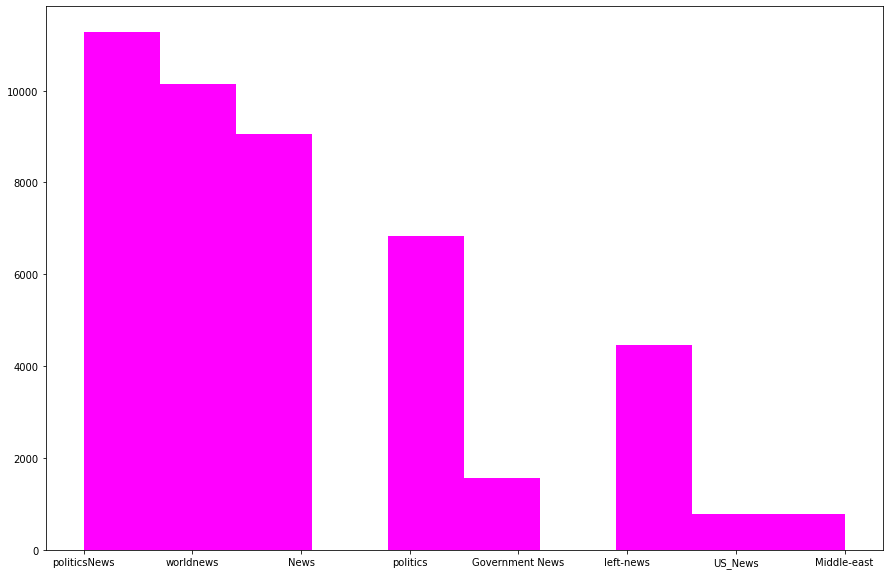

In [58]:
#Plot number of times 'subject' type listed
#fig, ax = plt.subplots()

plt.figure(figsize=(15,10))
plt.hist(all_df['subject'], bins = 10, color ='magenta')
ax.set_xlabel('Subjects')
ax.set_ylabel('Number of Occurrences')
ax.set_title(r'Histogram of Fake-True News Subjects')
#fig.tight_layout()

#plt.figure(figsize=(30,200))
plt.show()

## Method 1: Testing Bag of Words Model
We will compare and contrast results of using Random Forest Classifier with BOW method 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_fake_real = vectorizer.fit_transform(all_df['updated_text'])

In [60]:
len(vectorizer.get_feature_names())

59063

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
bag_of_words_fake_real.shape

(44898, 59063)

In [63]:
all_df['y'].shape

(44898,)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words_fake_real, all_df['y'],
                                                    random_state=42,
                                                    test_size=0.33)

In [65]:
y_train.shape

(30081,)

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc_bag = RandomForestClassifier()

rfc_bag.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
rfc_bag.score(X_train, y_train)

1.0

In [68]:
rfc_bag.score(X_test, y_test)

0.9688195991091314

### Word Cloud of Top 30 Words

### Plot the Word Cloud

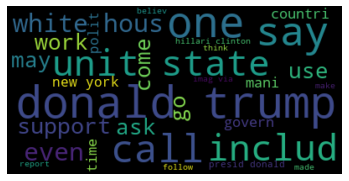

In [69]:
from wordcloud import WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

#c:\intelpython3\lib\site-packages\matplotlib\__init__.py:

import warnings
warnings.filterwarnings("ignore")

text_wc_visual = " ".join(text for text in all_df.updated_text)
# Create and generate a word cloud image: wordcloud = WordCloud().generate(text)

wordcloud_BOW = WordCloud(max_words = 30).generate(text_wc_visual)
#parameters = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_BOW, interpolation='bilinear')
plt.axis("off")
plt.show()                    

#### Word cloud for Fake words

In [70]:
#Fake data set -- clean it's text before showing in cloud
print(fake_df['text'].apply(clean_text))

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        reveal former milwauke sheriff david consid ho...
3        christma donald trump announc back work follow...
4        pope franci use annual christma day messag reb...
                               ...                        
23476    centuri wire say report earlier unlik mishap t...
23477    centuri wire say familiar whenev disput chang ...
23478    patrick henningsen centuri wirerememb obama ad...
23479    centuri wire say al jazeera america go histori...
23480    centuri wire say predict new year look new hos...
Name: text, Length: 23481, dtype: object


In [71]:
# Let's take a look at the updated text for fake_df
fake_df['updated_text'] = fake_df['text'].apply(clean_text)

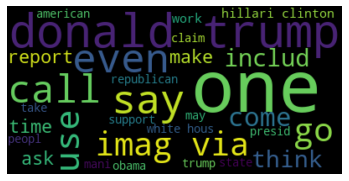

In [73]:
#Swap out 'text' for 'updated_text' for more accurate wordcloud on fake data
text_wc_visual_2 = " ".join(text for text in fake_df.updated_text)

wordcloud_BOW_2 = WordCloud(contour_color = "purple",max_words = 30).generate(text_wc_visual_2)
#Parameters to adjust = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_BOW_2, interpolation='bilinear')
plt.axis("off")
plt.show() 

## METHOD TWO: NLTK


## Testing Text Vector (spacy library) Method
We will compare and contrast results of using Random Forest Classifier from BOW method with results from Text Vector method. 

In [79]:
all_vectors = pd.concat([fake_vectors, true_vectors], ignore_index=True)

In [80]:
#Method 2 requires that X and y be trained as X2_, and y2_
X2_train, X2_test, y2_train, y2_test = train_test_split(all_vectors.drop(columns=['y']), 
                                                    all_vectors['y'], 
                                                    random_state=42,
                                                    test_size=0.33)

In [81]:
#Run a random forest classifier on vectors
y2_train.shape

(30081,)

In [82]:
#Classifier for Method 2 using vectors
rfc_vectors = RandomForestClassifier()

rfc_vectors.fit(X2_train, y2_train)

RandomForestClassifier()

In [83]:
#Apply classifier to X2 and y2 training set and obtain 'Score'.
rfc_vectors.score(X2_train, y2_train)

0.999966756424321

In [84]:
#Apply classifier to X2 and y2 testing set and obtain 'Score'.
rfc_vectors.score(X2_test, y2_test)

0.9682121887021664

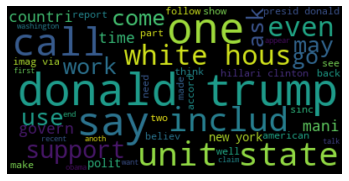

In [85]:
#Swap out with NLTK method for more accurate wordcloud on all data
text_wc_visual_3 = " ".join(text for text in all_df.updated_text)

wordcloud_nltk = WordCloud(contour_color = "pink",max_words = 50).generate(text_wc_visual_3)
#Parameters = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_nltk, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [ ]:
#Swap out with NLTK method for more accurate wordcloud on fake data
text_wc_visual_4 = " ".join(text for text in fake_df.updated_text)

wordcloud_nltk_2 = WordCloud(width = 500, contour_color = "green",
                      height= 300, 
                      random_state = 21,
                      max_words = 50,
                      max_font_size =110).generate(text_wc_visual_4)
                    
plt.imshow(wordcloud_nltk_2, interpolation='bilinear')
plt.axis("off")
plt.show() 

## Method 3: Universal Sentence Encoder
This method will encode text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.

In [78]:
%%capture
!pip3 install seaborn

In [77]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)
#What parts differ from the NLTK method?

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [86]:
#https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder

#Step 1: Get messages.
#messages = [word, sentence, paragraph]
messages = fake_df['updated_text']
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

#leaving as is b/c I'm referring to 'updated_text'
message_embeddings = embed(messages) #add report_tensor_allocations_upon_oom

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

ResourceExhaustedError:  OOM when allocating tensor with shape[8701303,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node StatefulPartitionedCall/StatefulPartitionedCall/EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/GatherV2}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_restored_function_body_5646]

Function call stack:
restored_function_body


In [ ]:
#Step 2: Define similarity function 
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

# Part 3: Facebook Political Ads Classified Into Fake Versus Authentic Via Random Forest Model 

## Part 3: Experiment: Overlay Classifier on Facebook Political Advertisements


In [ ]:
fb.dtypes

### CLF from Training of fake data sets
#### Predict outcomes for Facebook 
    Y_fb_pred = clf.predict(X_train_fake, Y_train_true).predict(X_test_fb_pol)
Y_fb_pred = clf.predict(X_fb_pol).  #Whole Test Set is FB Dataset

In [ ]:
#from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter

#stop = set(stopwords.words('english'))
#punctuation = list(string.punctuation)
#stop.update(punctuation)

In [ ]:
#should fe include "fb_vectors"?
fe = ['title','message','paid_for_by']
text_fb = fb[fe]
text_fb.head(-10)

#### Sample Facebook Text Data:
For the whole data set, we would need to vectorize Facebook Feature of Interest. However, this is resource intensive. As shown above, it takes over 30 minutes to vectorize both the true and fake data sets to create our model's classifier with over 96 percent accuracy. 


In [ ]:
#Facebook Vectors: Take from: Facebook dataframe 'fb' datafram
fb_vectors = fb['message'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

In [ ]:
#need values to be strings 
text_fb.dtypes

### Text Cleaning
We will review text in columns 'title','message','paid_for_by' for our Natural Language Processing project.

In [ ]:
'''Remove punctuation and "weird stuff like --" from ['title','message','paid_for_by'].'''

import re

def text_cleaner(text_fb):
    # Visual inspection identifies a form of punctuation spaCy does not
    text1 = re.sub(r'<.*?>',' ', text_fb) #removes the  pp beginning and end
    text1 = re.sub(r'--',' ',text_fb)  # recognize: the double dash '--'.  Better get rid of it now!
    text1 = re.sub("[\[].*?[\]]", "", text_fb)
    text1 = ' '.join(text_fb.split())
    return text1

#Used above in Part 2 to clean first body of text:
    #text = re.sub('<.*?>', "", text) #Remove html tag
    #pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') #Return leftover urls
    #text = re.sub(pattern, ' ', text) #includes pattern when the urls weren't removed from above

In [ ]:
'''clean_text_round2: Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
import re
import string

def clean_text_round2(text1):
    if pd.isna(text1):
        return text1
    
    text2 = text1.lower()
    text2 = re.sub('\[.*?\]', '', text1)
     #Add regex to address the 'p' where removing 'p' with brackets or remove first and last letter
    #text2 = re.sub('\p', ' ', text1)
    text2 = re.sub('\w*\d\w*', '', text1)
    text2 = re.sub('<.*?>', '', text1)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text1)
    text2 = re.sub('<.*?>', '', text1) #should remove 'p' from beginning
    return text2

# <.*?>

In [ ]:
#Test a 'message'
clean_text_round2(text_fb['message'].iloc[0])

In [ ]:
#Del suggestion to test clean
#Creating new column 'clean_message'

text_fb['clean_message'] = text_fb.message.apply(clean_text_round2)

In [ ]:
text_fb #See columns: ['message','clean_message'] that removed 'p'.

### Visual: WordCloud of Facebook Words 

In [ ]:
!pip install Image 

In [ ]:
!pip install BytesIO

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
#wine_mask = np.array(Image.open("img/wine_mask.png"))
#wine_mask

#face_mask = np.array(Image.open("/Users/mehrunisaqayyum/Downloads/Hug-PNG-Free-Download.png"))
face_mask = np.array(Image.open("http://www.pngmart.com/files/11/Hug-PNG-Free-Download.png"))
face_mask

In [ ]:
#Use Facebook 'updated_text' label with all text more accurate wordcloud on fake data



text_wc_visual_5 = " ".join(text for text in text_fb.clean_message)

wordcloud_facebook = WordCloud(width = 500, 
                      contour_color = "blue",
                      height= 300, 
                      random_state = 21,
                      max_words = 50,
                      max_font_size =110).generate(text_wc_visual_5)
                    
plt.imshow(wordcloud_facebook, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Dataset = From text_fb sample of 200 
## Removed 'weights='paid_for_by''
your_sample_for_testing = text_fb.sample(n=200, random_state=123)
your_sample_for_testing.to_excel("your_sample_for_testing.xlsx")

In [ ]:
#Read data from cleaned sample of 200 records randomly selected in Excel.
df_for_prediction = pd.read_excel('your_sample_for_testing (1).xlsx')

In [ ]:
df_for_prediction['message'] = df_for_prediction['message'].str.replace('<.*?>', '').str.lower()

### Vectors Classifier

In [ ]:
#Vectorize the sample features from the Excel sample set.
#Need to run in classifier model experiment.
df_for_prediction_vectors = df_for_prediction['message'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

In [ ]:
rfc_vectors.score(df_for_prediction_vectors, df_for_prediction['real_one'])

#### Note: We see that our experimental model produced a low accuracy score of 18.5 percent. This is below our expectations given that the original classifer developed above in Part 2  achieved a 96 percent accuracy score on the test set. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(df_for_prediction['real_one'], rfc_vectors.predict(df_for_prediction_vectors)))

#### Note: Discussion of 'Precision' and 'Recall'. 

In [ ]:
#Reviewing Confusion Matrix to check results

print(confusion_matrix(df_for_prediction['real_one'], rfc_vectors.predict(df_for_prediction_vectors)))

In [ ]:
TO DO Notes:
#Note: Try on Bag of Words classifier on same sample of 200 FB messages ntext (not vectors)
    #Use df_for_prediction['message']
    
#Time permitting Universal Encoder 

### Bag of Words Classifier

In [ ]:
#Check with Tiago
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_fb_sample = vectorizer.fit_transform(df_for_prediction['message'])

In [ ]:
#Replace RFC Method. 
    #Swap out first argument for actual messages, not vectors. Keep second argument b/c that's what is what we're comparing. 
    #rfc_vectors.score(df_for_prediction_vectors, df_for_prediction['real_one'])

#rfc_bag.score(df_for_prediction['message'], (df_for_prediction['real_one'])
              
#Tech Support

#rfc_bag.score(df_for_prediction['message'], df_for_prediction['real_one'])
rfc_bag.score(df_for_prediction['message'], df_for_prediction['real_one'])

In [ ]:
#Tech Support
#Micah G.01:57 PM
#First of all, there's a syntax error

rfc_bag.score(df_for_prediction['message'], (df_for_prediction['real_one']) )

is tyhe right code

the

rfc_bag.score(df_for_prediction['message'], df_for_prediction['real_one'])

could you run this code?

rfc_bag.score(df_for_prediction['message'], df_for_prediction['real_one'])

In [ ]:
df_for_prediction['message']

In [ ]:
text_fb.title.str.lower()
#applied lower case method to title column
#how to iterate over every row?

In [ ]:
text_fb.dtypes

#### Methodology Note: 
We need to parse the cleaned data. The cleaned data represents the Facebook text in the 'message' column. We could include the 'title' column as well to match the 'title' with the corresponding message as a measure of checking authenticity the way the New York Times Challenge demonstrated.

Should we undertake: Topic Modeling?

### Top Fifty Words


In [ ]:
#Identify top 50 words in Facebook Messages 'text_fb'
f = Counter()

#ignore_this = all_df['updated_text'].apply(lambda row: c.update(row.split(" ")))
ignore_this2 = text_fb['clean_message'].apply(lambda row: f.update(row.split(" ")))

In [ ]:
top_words_fb = f.most_common(50)
top_words_fb

### WordCloud: Facebook Political Ad (Messages)
Reviewing top 50 words in messages.

In [ ]:
# Create and generate a word cloud image: wordcloud = WordCloud().generate(text)
#text_wc_visual2 = " ".join(text for text in text_fb.clean_text)


wordcloud_BOW2 = WordCloud().generate(top_words_fb) #(text_wc_visual2)
#wordcloud_BOW = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_BOW2, interpolation='bilinear')
plt.axis("off")
plt.show() 

### Apply Method 1: Random Forest Classifier Applying Bag of Words
rfc_bag

In [ ]:
#apply bag classifier
X_test_fb_message = rfc_bag.fit(X_train_fake, Y_train_true).predict(X_test_fb_message)
clf.predict(X_test_fb_message,Y_test_fb_pred)

### Apply Method 2: Random Forest Classifier Applying Vectors
rfc_vectors

In [ ]:
Y_fb_pred_B = 
rfc_vectors.fit(X2_train, y2_train)

In [ ]:
#Concatenating
fb_df2 = pd.concat([fb, fb_likes], ignore_index=True, sort =True)
fb_df2

In [ ]:
fb_df2.columns

In [ ]:
fb_df2.dtypes

In [ ]:
fb.describe()

### Pickle Data on Facebook ads

In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

## Semantic Analysis: Turning FB message into Vectors
We note the stop words and review counts of words from tf-idf.

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in title")

#### Observations:
Top 5 most common words are ranked:
    1) 'Committee'
    2)'International'
    3) 'Action' and 'Planned'
    4) 'Parenthood'
    
USA and 'America' are interchangeable--so maybe these are double-counting. 

'Democratic' not used as much as nonpolitical word of 'rescue'. However, we do not see 'Republican' or 'GOP'. 

'Beto' and'O'Rourke' are occuring at same rate. This is the only person to show up in this political ad data set. 

### Most Common 'Paid For By'

In [ ]:
corpus=build_list(text_fb,"paid_for_by")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("Most Common Word in 'paid_for_by'")

### Figure of 'Number of Top Ad Titles'
To highlight the ads that we would should review for fake versus true classifier to strenghten business case for impact.

In [ ]:
def plot_count(feature, title,fb, size=1, show_percents=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 4))
    total = float(len(fb))
    g = sns.countplot(fb[feature],order = fb[feature].value_counts().index[0:20], palette='Set3')
    g.set_title("Number of {}".format(title))
    if (size > 2):
        plt.xticks(rotation=90, size=10)
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                   height + 3, '{:1.2f}%'.format(100*height/total),
                   ha="center")
    ax.set_xticklabels(ax.get_xticklabels());
    plt.show()

In [ ]:
plot_count('title','Top Ad Titles', text_fb, 3.5)
#plt.title("Number of Top Ad Titles")

### Figure: Number of Most Popular Messages

In [ ]:
#Note the number (counts) of message.
plot_count('message','message countplot', text_fb, 3.5)

In [ ]:
#data means fb_text_df
top_words_in_ads_dict = {}
for c in fb_text_df.columns:
    top = fb_text_df[c].sort_values(ascending=False).head(30)
    top_words_in_ads_dict[c]= list(zip(top.index, top.values))

top_words_in_ads_dict

### Frequency of Words


In [ ]:
fb['message'].dtype

In [ ]:
fb.message.iloc[1:10]

In [ ]:
temp_variable = "".join(fb.message.iloc[1:1000])

### Convert sentences into numeric vectors.
We need to transform sentences into NUMERIC vectors so that the vectors can be included in a Random Forest Classifier model, which cannot use string values.

First we must create list.

## Part 4: Conclusion and Future Exploration: 
### Sentiment Analysis
Source: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/3-Sentiment-Analysis.ipynb Regarding text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to note with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels. Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these. Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive. Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion. For more info on how TextBlob coded up its sentiment function.

In [ ]:
#fb_df2
fb.loc[0:5, 'message']

In [ ]:

TextBlob('The Mueller investigation is over').sentiment

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each message
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

fb['polarity'] = fb['message'].apply(pol)
fb['subjectivity'] = fb['title'].apply(sub)
fb

#If joining previous FB dataset

fb_df2['polarity'] = fb_df2['message'].apply(pol)
fb_df2['subjectivity'] = fb_df2['title'].apply(sub)
fb_df2

In [ ]:
# Cleaned Text before Identifying 'Stopwords'
from collections import Counter

# Utility function to calculate how frequently words appear in the data sets.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
political_freq = word_frequencies(temp_variable).most_common(10)
#like_freq = word_frequencies().most_common(10)
print('Political:', political_freq)
#print('Popular:', like_freq)

In [ ]:
#Use spacy to count frequency of words

!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# All the processing work is done here, so it may take a while.
FB_political_doc = nlp(temp_variable)
#FB_popuarity_doc = nlp()

### Lemmatization of Facebook Messages

In [ ]:
# Use 'reporting'
lem_2 = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "reporting" 
lem_2.lemmatize(word, "v")

stem.stem(word)